In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv(r'D:\New folder\my projects\sepsis_status.csv')

In [6]:
data

encounter_id  patient_id  hospital_id  Unnamed: 3   age        bmi  \
0             66154       25312          118         NaN  68.0  22.730000   
1            114252       59342           81         NaN  77.0  27.420000   
2            119783       50777          118         NaN  25.0  31.950000   
3             79267       46918          118         NaN  81.0  22.640000   
4             92056       34377           33         NaN  19.0        NaN   
...             ...         ...          ...         ...   ...        ...   
91708         91592       78108           30         NaN  75.0  23.060250   
91709         66119       13486          121         NaN  56.0  47.179671   
91710          8981       58179          195         NaN  48.0  27.236914   
91711         33776      120598           66         NaN   NaN  23.297481   
91712          1671       53612          104         NaN  82.0  22.031250   

       elective_surgery  ethnicity gender  height  ... hepatic_failure  \
0                     0  Caucasian      M   180.3  ...             0.0   
1                     0  Caucasian      F   160.0  ...             0.0   
2                     0  Caucasian      F   172.7  ...             0.0   
3                     1  Caucasian      F   165.1  ...             0.0   
4                     0  Caucasian      M   188.0  ...             0.0   
...                 ...        ...    ...     ...  ...             ...   
91708                 0  Caucasian      M   177.8  ...             0.0   
91709                 0  Caucasian      F   183.0  ...             0.0   
91710                 0  Caucasian      M   170.2  ...             0.0   
91711                 0  Caucasian      F   154.9  ...             0.0   
91712                 1  Caucasian      F   160.0  ...             0.0   

      immunosuppression  leukemia lymphoma solid_tumor_with_metastasis  \
0                   0.0       0.0      0.0                         0.0   
1                   0.0       0.0      0.0                         0.0   
2                   0.0       0.0      0.0                         0.0   
3                   0.0       0.0      0.0                         0.0   
4                   0.0       0.0      0.0                         0.0   
...                 ...       ...      ...                         ...   
91708               0.0       0.0      0.0                         1.0   
91709               0.0       0.0      0.0                         0.0   
91710               0.0       0.0      0.0                         0.0   
91711               0.0       0.0      0.0                         0.0   
91712               0.0       0.0      0.0                         0.0   

       apache_3j_bodysystem  apache_2_bodysystem  Unnamed: 186  Unnamed: 187  \
0                    Sepsis       Cardiovascular           NaN           NaN   
1               Respiratory          Respiratory           NaN           NaN   
2                 Metabolic            Metabolic           NaN           NaN   
3            Cardiovascular       Cardiovascular           NaN           NaN   
4                    Trauma               Trauma           NaN           NaN   
...                     ...                  ...           ...           ...   
91708                Sepsis       Cardiovascular           NaN           NaN   
91709                Sepsis       Cardiovascular           NaN           NaN   
91710             Metabolic            Metabolic           NaN           NaN   
91711           Respiratory          Respiratory           NaN           NaN   
91712      Gastrointestinal     Gastrointestinal           NaN           NaN   

       sepsis_status  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
91708              0  
91709              0  
91710              0  
91711              0  
91712              0  

[91713 rows x 189 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 189 entries, encounter_id to sepsis_status
dtypes: float64(173), int64(8), object(8)
memory usage: 132.2+ MB


In [8]:
data.describe(include='all')

encounter_id     patient_id   hospital_id  Unnamed: 3           age  \
count    91713.000000   91713.000000  91713.000000         0.0  87485.000000   
unique            NaN            NaN           NaN         NaN           NaN   
top               NaN            NaN           NaN         NaN           NaN   
freq              NaN            NaN           NaN         NaN           NaN   
mean     65606.079280   65537.131464    105.669262         NaN     62.309516   
std      37795.088538   37811.252183     62.854406         NaN     16.775119   
min          1.000000       1.000000      2.000000         NaN     16.000000   
25%      32852.000000   32830.000000     47.000000         NaN     52.000000   
50%      65665.000000   65413.000000    109.000000         NaN     65.000000   
75%      98342.000000   98298.000000    161.000000         NaN     75.000000   
max     131051.000000  131051.000000    204.000000         NaN     89.000000   

                 bmi  elective_surgery  ethnicity gender        height  ...  \
count   88284.000000      91713.000000      90318  91688  90379.000000  ...   
unique           NaN               NaN          6      2           NaN  ...   
top              NaN               NaN  Caucasian      M           NaN  ...   
freq             NaN               NaN      70684  49469           NaN  ...   
mean       29.185818          0.183736        NaN    NaN    169.641588  ...   
std         8.275142          0.387271        NaN    NaN     10.795378  ...   
min        14.844926          0.000000        NaN    NaN    137.200000  ...   
25%        23.641975          0.000000        NaN    NaN    162.500000  ...   
50%        27.654655          0.000000        NaN    NaN    170.100000  ...   
75%        32.930206          0.000000        NaN    NaN    177.800000  ...   
max        67.814990          1.000000        NaN    NaN    195.590000  ...   

       hepatic_failure immunosuppression      leukemia      lymphoma  \
count     90998.000000      90998.000000  90998.000000  90998.000000   
unique             NaN               NaN           NaN           NaN   
top                NaN               NaN           NaN           NaN   
freq               NaN               NaN           NaN           NaN   
mean          0.012989          0.026165      0.007066      0.004132   
std           0.113229          0.159628      0.083763      0.064148   
min           0.000000          0.000000      0.000000      0.000000   
25%           0.000000          0.000000      0.000000      0.000000   
50%           0.000000          0.000000      0.000000      0.000000   
75%           0.000000          0.000000      0.000000      0.000000   
max           1.000000          1.000000      1.000000      1.000000   

       solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  \
count                 90998.000000                 90051                90051   
unique                         NaN                    11                   10   
top                            NaN        Cardiovascular       Cardiovascular   
freq                           NaN                 29999                38816   
mean                      0.020638                   NaN                  NaN   
std                       0.142169                   NaN                  NaN   
min                       0.000000                   NaN                  NaN   
25%                       0.000000                   NaN                  NaN   
50%                       0.000000                   NaN                  NaN   
75%                       0.000000                   NaN                  NaN   
max                       1.000000                   NaN                  NaN   

        Unnamed: 186  Unnamed: 187  sepsis_status  
count            0.0           0.0   91713.000000  
unique           NaN           NaN            NaN  
top              NaN           NaN            NaN  
freq             NaN           NaN            NaN  
m

In [9]:
data.isnull().sum()
pd.set_option('display.max_columns', None)

In [10]:
data

encounter_id  patient_id  hospital_id  Unnamed: 3   age        bmi  \
0             66154       25312          118         NaN  68.0  22.730000   
1            114252       59342           81         NaN  77.0  27.420000   
2            119783       50777          118         NaN  25.0  31.950000   
3             79267       46918          118         NaN  81.0  22.640000   
4             92056       34377           33         NaN  19.0        NaN   
...             ...         ...          ...         ...   ...        ...   
91708         91592       78108           30         NaN  75.0  23.060250   
91709         66119       13486          121         NaN  56.0  47.179671   
91710          8981       58179          195         NaN  48.0  27.236914   
91711         33776      120598           66         NaN   NaN  23.297481   
91712          1671       53612          104         NaN  82.0  22.031250   

       elective_surgery  ethnicity gender  height hospital_admit_source  \
0                     0  Caucasian      M   180.3                 Floor   
1                     0  Caucasian      F   160.0                 Floor   
2                     0  Caucasian      F   172.7  Emergency Department   
3                     1  Caucasian      F   165.1        Operating Room   
4                     0  Caucasian      M   188.0                   NaN   
...                 ...        ...    ...     ...                   ...   
91708                 0  Caucasian      M   177.8      Acute Care/Floor   
91709                 0  Caucasian      F   183.0  Emergency Department   
91710                 0  Caucasian      M   170.2  Emergency Department   
91711                 0  Caucasian      F   154.9  Emergency Department   
91712                 1  Caucasian      F   160.0                   NaN   

                icu_admit_source  icu_id icu_stay_type      icu_type  \
0                          Floor      92         admit         CTICU   
1                          Floor      90         admit  Med-Surg ICU   
2           Accident & Emergency      93         admit  Med-Surg ICU   
3      Operating Room / Recovery      92         admit         CTICU   
4           Accident & Emergency      91         admit  Med-Surg ICU   
...                          ...     ...           ...           ...   
91708                      Floor     927         admit   Cardiac ICU   
91709                      Floor     925         admit  Med-Surg ICU   
91710       Accident & Emergency     908         admit  Med-Surg ICU   
91711       Accident & Emergency     922         admit  Med-Surg ICU   
91712  Operating Room / Recovery     926         admit  Med-Surg ICU   

       pre_icu_los_days  readmission_status  weight  albumin_apache  \
0              0.541667                   0    73.9             2.3   
1              0.927778                   0    70.2             NaN   
2              0.000694                   0    95.3             NaN   
3              0.000694                   0    61.7             NaN   
4              0.073611                   0     NaN             NaN   
...                 ...                 ...     ...             ...   
91708          0.298611                   0    72.9             NaN   
91709          0.120139                   0   158.0             NaN   
91710          0.046528                   0    78.9             2.9   
91711          0.081944                   0    55.9             NaN   
91712          0.018056                   0    56.4             2.2   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
0                   113.0               502.01                      0   
1                   108.0               203.01                      0   
2                   122.0               703.03                      0   
3                   203.0              1206.03                      1   
4                   119.0               601.01                      0   
...                   ...

In [11]:
for i in data.columns:
    print(f'The unique values in feature {i}',data[i].unique(),sep='\n')
    print('----------------------------------------------------------')

The unique values in feature encounter_id
[ 66154 114252 119783 ...   8981  33776   1671]
----------------------------------------------------------
The unique values in feature patient_id
[ 25312  59342  50777 ...  58179 120598  53612]
----------------------------------------------------------
The unique values in feature hospital_id
[118  81  33  83  77 149  31 151  69  46  63 113 137  89 168 150 140  34
  74 102  91 198 129   4 124  68 138 174 134 169  57 177 155  85  78  95
  98 105  76   5 116 119  79 171 161 128 147 112  32  55  17 136  44 179
  88  23 130  72 109  10 204 117 202  70 160  62  16 199  54 100 186  20
 107  14 132  87  53  21  99  71 182  24 200 189  60  84  26 133  27   8
 194 111 176 187  39 101  80  90  19  94  50 192  43 145 180  40   9  93
 185 159 166 157  64 125  92  13  37 139 135  51  18 181 158 196  47 103
 197  38 188   2  49 142  35  15 146  29  36 167  30 184 104 121 195   3
   6 183  66]
----------------------------------------------------------
The un

In [12]:
for j in data:
    print(f'The null values in feature {j}',data[j].isnull().sum() * 100 / len(data),sep='\n')
    print('----------------------------------------------------------')

The null values in feature encounter_id
0.0
----------------------------------------------------------
The null values in feature patient_id
0.0
----------------------------------------------------------
The null values in feature hospital_id
0.0
----------------------------------------------------------
The null values in feature Unnamed: 3
100.0
----------------------------------------------------------
The null values in feature age
4.61003347398951
----------------------------------------------------------
The null values in feature bmi
3.738837460338229
----------------------------------------------------------
The null values in feature elective_surgery
0.0
----------------------------------------------------------
The null values in feature ethnicity
1.521049360505054
----------------------------------------------------------
The null values in feature gender
0.027258949112993796
----------------------------------------------------------
The null values in feature height
1.45453

In [13]:
perc = 10.0
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data = data.dropna( axis=1, 
                thresh=min_count)


In [14]:
for j in data:
    print(f'The null values in feature {j}',data[j].isnull().sum() * 100 / len(data),sep='\n')
    print('----------------------------------------------------------')

The null values in feature encounter_id
0.0
----------------------------------------------------------
The null values in feature patient_id
0.0
----------------------------------------------------------
The null values in feature hospital_id
0.0
----------------------------------------------------------
The null values in feature age
4.61003347398951
----------------------------------------------------------
The null values in feature bmi
3.738837460338229
----------------------------------------------------------
The null values in feature elective_surgery
0.0
----------------------------------------------------------
The null values in feature ethnicity
1.521049360505054
----------------------------------------------------------
The null values in feature gender
0.027258949112993796
----------------------------------------------------------
The null values in feature height
1.454537524669349
----------------------------------------------------------
The null values in feature icu_ad

In [15]:
data

encounter_id  patient_id  hospital_id   age        bmi  \
0             66154       25312          118  68.0  22.730000   
1            114252       59342           81  77.0  27.420000   
2            119783       50777          118  25.0  31.950000   
3             79267       46918          118  81.0  22.640000   
4             92056       34377           33  19.0        NaN   
...             ...         ...          ...   ...        ...   
91708         91592       78108           30  75.0  23.060250   
91709         66119       13486          121  56.0  47.179671   
91710          8981       58179          195  48.0  27.236914   
91711         33776      120598           66   NaN  23.297481   
91712          1671       53612          104  82.0  22.031250   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
0                     0  Caucasian      M   180.3                      Floor   
1                     0  Caucasian      F   160.0                      Floor   
2                     0  Caucasian      F   172.7       Accident & Emergency   
3                     1  Caucasian      F   165.1  Operating Room / Recovery   
4                     0  Caucasian      M   188.0       Accident & Emergency   
...                 ...        ...    ...     ...                        ...   
91708                 0  Caucasian      M   177.8                      Floor   
91709                 0  Caucasian      F   183.0                      Floor   
91710                 0  Caucasian      M   170.2       Accident & Emergency   
91711                 0  Caucasian      F   154.9       Accident & Emergency   
91712                 1  Caucasian      F   160.0  Operating Room / Recovery   

       icu_id icu_stay_type      icu_type  pre_icu_los_days  \
0          92         admit         CTICU          0.541667   
1          90         admit  Med-Surg ICU          0.927778   
2          93         admit  Med-Surg ICU          0.000694   
3          92         admit         CTICU          0.000694   
4          91         admit  Med-Surg ICU          0.073611   
...       ...           ...           ...               ...   
91708     927         admit   Cardiac ICU          0.298611   
91709     925         admit  Med-Surg ICU          0.120139   
91710     908         admit  Med-Surg ICU          0.046528   
91711     922         admit  Med-Surg ICU          0.081944   
91712     926         admit  Med-Surg ICU          0.018056   

       readmission_status  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                       0    73.9               113.0               502.01   
1                       0    70.2               108.0               203.01   
2                       0    95.3               122.0               703.03   
3                       0    61.7               203.0              1206.03   
4                       0     NaN               119.0               601.01   
...                   ...     ...                 ...                  ...   
91708                   0    72.9               113.0               501.06   
91709                   0   158.0               113.0               501.05   
91710                   0    78.9               123.0               702.01   
91711                   0    55.9               108.0               203.01   
91712                   0    56.4               304.0              1409.02   

       apache_post_operative  arf_apache  gcs_eyes_apache  gcs_motor_apache  \
0                          0         0.0              3.0               6.0   
1                          0         0.0              1.0               3.0   
2                          0         0.0              3.0               6.0   
3                          1         0.0              4.0               6.0   
4                          0         0.0              NaN               NaN   
...                      ...         ...              ...               ...   
91708             

In [16]:
data2=data.isnull()

In [17]:
data.fillna(data.mean(),inplace=True)

In [18]:
data.isnull().value_counts()

encounter_id  patient_id  hospital_id  age    bmi    elective_surgery  ethnicity  gender  height  icu_admit_source  icu_id  icu_stay_type  icu_type  pre_icu_los_days  readmission_status  weight  apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  d1_resprate_max  d1_resprate_min  d1_spo2_max  d1_spo2_min  d1_sysbp_max  d1_sysbp_min  d1_sysbp_noninvasive_max  d1_sysbp_noninvasive_min  d1_temp_max  d1_temp_min  h1_diasbp_max  h1_diasbp_min  h1_diasbp_noninvasive_max  h1_diasbp_noninvasive_min  h1_heartrate_max  h1_heartrate_min  h1_mbp_max  h1_mbp_min  h1_mbp_noninvasive_max  h1_mbp_noninvasive_min  h1_respr

In [19]:
for j in data:
    print(f'The null values in feature {j}',data[j].isnull().sum(),sep='\n')
    print('----------------------------------------------------------')

The null values in feature encounter_id
0
----------------------------------------------------------
The null values in feature patient_id
0
----------------------------------------------------------
The null values in feature hospital_id
0
----------------------------------------------------------
The null values in feature age
0
----------------------------------------------------------
The null values in feature bmi
0
----------------------------------------------------------
The null values in feature elective_surgery
0
----------------------------------------------------------
The null values in feature ethnicity
1395
----------------------------------------------------------
The null values in feature gender
25
----------------------------------------------------------
The null values in feature height
0
----------------------------------------------------------
The null values in feature icu_admit_source
112
----------------------------------------------------------
The null val

In [20]:
data.duplicated().sum()

0

In [21]:
data.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
age                               0
bmi                               0
                               ... 
lymphoma                          0
solid_tumor_with_metastasis       0
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
sepsis_status                     0
Length: 83, dtype: int64

In [22]:
data

encounter_id  patient_id  hospital_id        age        bmi  \
0             66154       25312          118  68.000000  22.730000   
1            114252       59342           81  77.000000  27.420000   
2            119783       50777          118  25.000000  31.950000   
3             79267       46918          118  81.000000  22.640000   
4             92056       34377           33  19.000000  29.185818   
...             ...         ...          ...        ...        ...   
91708         91592       78108           30  75.000000  23.060250   
91709         66119       13486          121  56.000000  47.179671   
91710          8981       58179          195  48.000000  27.236914   
91711         33776      120598           66  62.309516  23.297481   
91712          1671       53612          104  82.000000  22.031250   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
0                     0  Caucasian      M   180.3                      Floor   
1                     0  Caucasian      F   160.0                      Floor   
2                     0  Caucasian      F   172.7       Accident & Emergency   
3                     1  Caucasian      F   165.1  Operating Room / Recovery   
4                     0  Caucasian      M   188.0       Accident & Emergency   
...                 ...        ...    ...     ...                        ...   
91708                 0  Caucasian      M   177.8                      Floor   
91709                 0  Caucasian      F   183.0                      Floor   
91710                 0  Caucasian      M   170.2       Accident & Emergency   
91711                 0  Caucasian      F   154.9       Accident & Emergency   
91712                 1  Caucasian      F   160.0  Operating Room / Recovery   

       icu_id icu_stay_type      icu_type  pre_icu_los_days  \
0          92         admit         CTICU          0.541667   
1          90         admit  Med-Surg ICU          0.927778   
2          93         admit  Med-Surg ICU          0.000694   
3          92         admit         CTICU          0.000694   
4          91         admit  Med-Surg ICU          0.073611   
...       ...           ...           ...               ...   
91708     927         admit   Cardiac ICU          0.298611   
91709     925         admit  Med-Surg ICU          0.120139   
91710     908         admit  Med-Surg ICU          0.046528   
91711     922         admit  Med-Surg ICU          0.081944   
91712     926         admit  Med-Surg ICU          0.018056   

       readmission_status     weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                       0   73.90000               113.0               502.01   
1                       0   70.20000               108.0               203.01   
2                       0   95.30000               122.0               703.03   
3                       0   61.70000               203.0              1206.03   
4                       0   84.02834               119.0               601.01   
...                   ...        ...                 ...                  ...   
91708                   0   72.90000               113.0               501.06   
91709                   0  158.00000               113.0               501.05   
91710                   0   78.90000               123.0               702.01   
91711                   0   55.90000               108.0               203.01   
91712                   0   56.40000               304.0              1409.02   

       apache_post_operative  arf_apache  gcs_eyes_apache  gcs_motor_apache  \
0                          0         0.0         3.000000          6.000000   
1                          0         0.0         1.000000          3.000000   
2                          0         0.0         3.000000          6.000000   
3                          1         0.0         4.000000          6.000000   
4                          0         0.0         3.465049          5.471195   
.

In [23]:
data['ethnicity'] = data['ethnicity'].fillna(data['ethnicity'].mode()[0])

In [24]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

In [25]:
data['icu_admit_source'] = data['icu_admit_source'].fillna(data['icu_admit_source'].mode()[0])

In [26]:
data['apache_3j_bodysystem'] = data['apache_3j_bodysystem'].fillna(data['apache_3j_bodysystem'].mode()[0])

In [27]:
data['apache_2_bodysystem'] = data['apache_2_bodysystem'].fillna(data['apache_2_bodysystem'].mode()[0])

In [28]:
data=data.astype('int',errors='ignore')

In [29]:
data.isnull().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
age                            0
bmi                            0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
sepsis_status                  0
Length: 83, dtype: int64

In [30]:
for j in data:
    print(f'The null values in feature {j}',data[j].isnull().sum(),sep='\n')
    print('----------------------------------------------------------')

The null values in feature encounter_id
0
----------------------------------------------------------
The null values in feature patient_id
0
----------------------------------------------------------
The null values in feature hospital_id
0
----------------------------------------------------------
The null values in feature age
0
----------------------------------------------------------
The null values in feature bmi
0
----------------------------------------------------------
The null values in feature elective_surgery
0
----------------------------------------------------------
The null values in feature ethnicity
0
----------------------------------------------------------
The null values in feature gender
0
----------------------------------------------------------
The null values in feature height
0
----------------------------------------------------------
The null values in feature icu_admit_source
0
----------------------------------------------------------
The null values in

In [31]:
matrix=data.corr()

In [32]:
plt.figure(figsize=(100,100))
sns.heatmap(data.corr(),annot=True)


<Axes: >

In [33]:
upper=matrix.where(np.triu(np.ones(matrix.shape),k=1).astype(bool))

In [34]:
upper

encounter_id  patient_id  hospital_id       age  \
encounter_id                          NaN   -0.009575    -0.004532 -0.003883   
patient_id                            NaN         NaN    -0.007075  0.006199   
hospital_id                           NaN         NaN          NaN -0.008460   
age                                   NaN         NaN          NaN       NaN   
bmi                                   NaN         NaN          NaN       NaN   
...                                   ...         ...          ...       ...   
immunosuppression                     NaN         NaN          NaN       NaN   
leukemia                              NaN         NaN          NaN       NaN   
lymphoma                              NaN         NaN          NaN       NaN   
solid_tumor_with_metastasis           NaN         NaN          NaN       NaN   
sepsis_status                         NaN         NaN          NaN       NaN   

                                  bmi  elective_surgery    height    icu_id  \
encounter_id                -0.001104          0.002036 -0.005258 -0.000992   
patient_id                  -0.001238          0.001387  0.002925 -0.001770   
hospital_id                  0.012620          0.052123  0.026476  0.004526   
age                         -0.083277          0.066566 -0.105936 -0.023658   
bmi                               NaN          0.015851 -0.055030  0.000249   
...                               ...               ...       ...       ...   
immunosuppression                 NaN               NaN       NaN       NaN   
leukemia                          NaN               NaN       NaN       NaN   
lymphoma                          NaN               NaN       NaN       NaN   
solid_tumor_with_metastasis       NaN               NaN       NaN       NaN   
sepsis_status                     NaN               NaN       NaN       NaN   

                             pre_icu_los_days  readmission_status    weight  \
encounter_id                        -0.000696                 NaN -0.004316   
patient_id                          -0.004183                 NaN  0.000237   
hospital_id                         -0.001932                 NaN  0.026063   
age                                  0.044363                 NaN -0.122236   
bmi                                 -0.002092                 NaN  0.873403   
...                                       ...                 ...       ...   
immunosuppression                         NaN                 NaN       NaN   
leukemia                                  NaN                 NaN       NaN   
lymphoma                                  NaN                 NaN       NaN   
solid_tumor_with_metastasis               NaN                 NaN       NaN   
sepsis_status                             NaN                 NaN       NaN   

                             apache_2_diagnosis  apache_3j_diagnosis  \
encounter_id                           0.000111            -0.000648   
patient_id                            -0.001521             0.004190   
hospital_id                            0.006744             0.031705   
age                                    0.022502            -0.054866   
bmi                                    0.025433            -0.006132   
...                                         ...                  ...   
immunosuppression                           NaN                  NaN   
leukemia                                    NaN                  NaN   
lymphoma                                    NaN                  NaN   
solid_tumor_with_metastasis                 NaN                  NaN   
sepsis_status                               NaN                  NaN   

                             apache_post_operative  arf_apache  \
encounter_id                              0.001138    0.007913   
patient_id                                0.002260    0.003999   
hospital_id                               0.053985    0.000732   
age                                      

<Axes: >

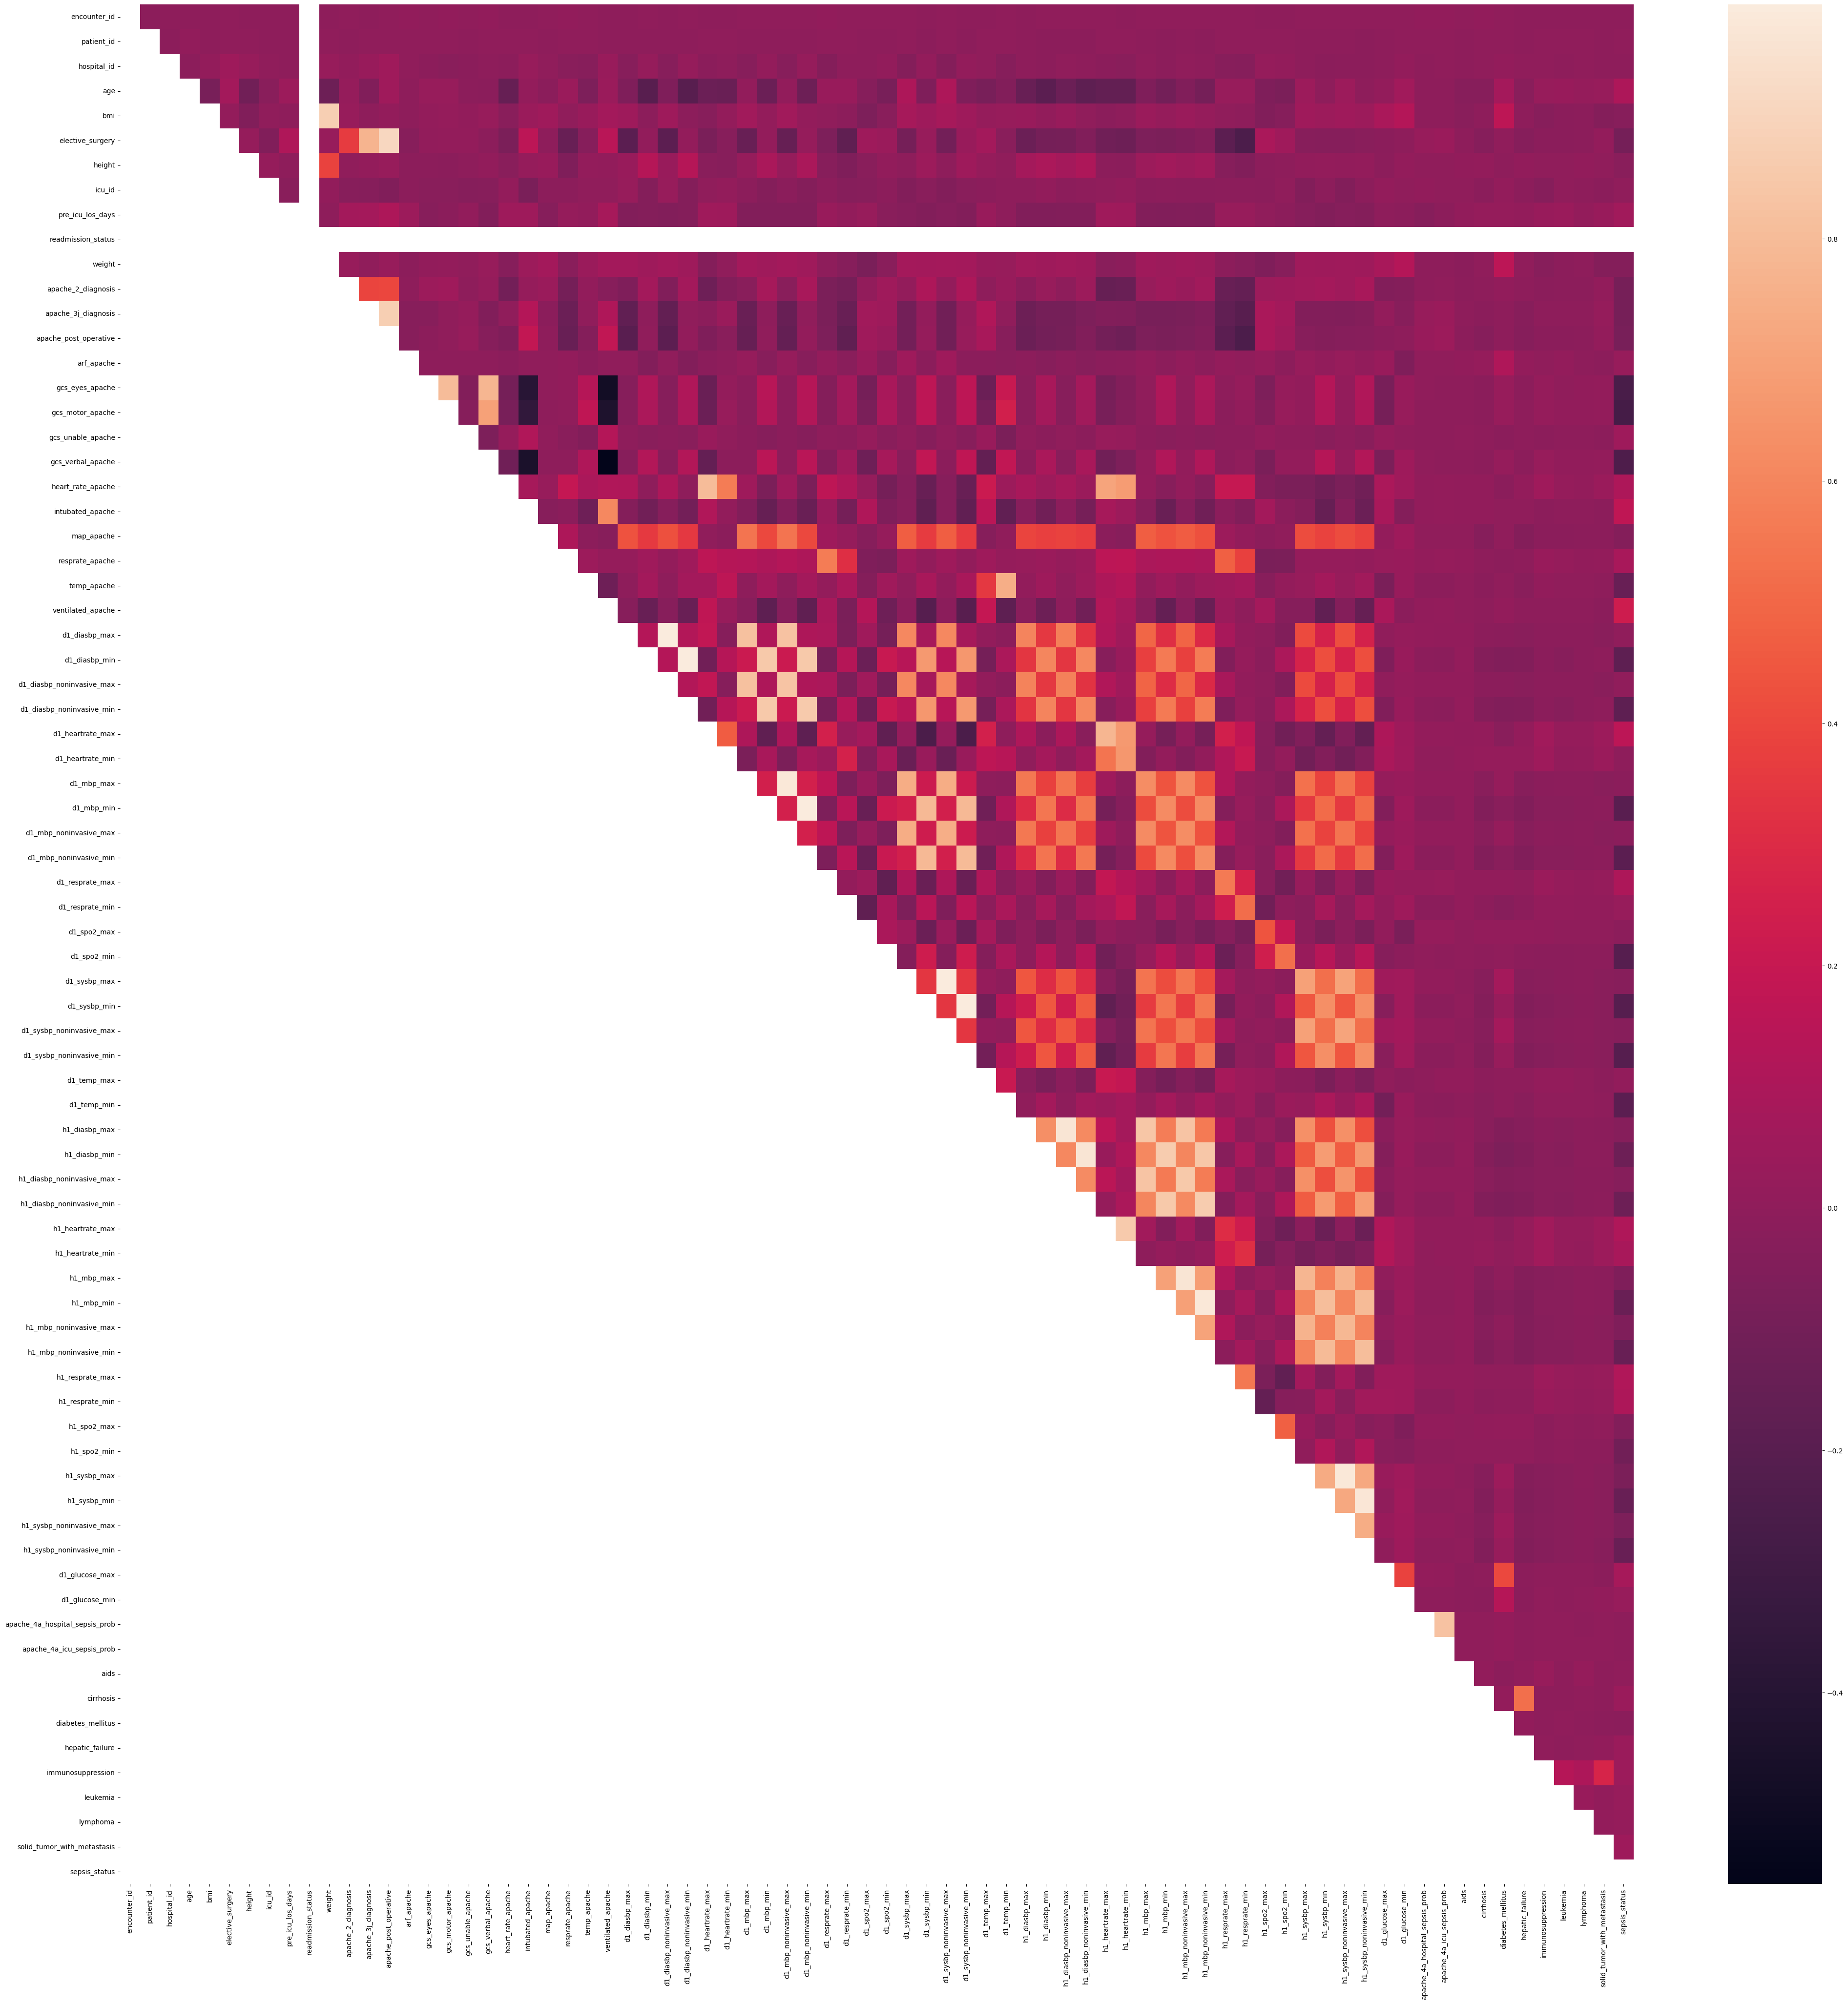

In [35]:
plt.figure(figsize=(50,50))
sns.heatmap(upper)

In [36]:
neg_correleted1=[column for column in matrix.columns
               if any(upper[column]<=-0.9)]
pos_correleted1=[column for column in matrix.columns
               if any(upper[column]>=0.9)]
print(neg_correleted1)
print("******"*5)
print(pos_correleted1)

[]
******************************
['apache_post_operative', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min']


In [37]:
total_correleted1=neg_correleted1+pos_correleted1
print("number of columns having high corr coff need to drop", len(total_correleted1))

number of columns having high corr coff need to drop 13


In [38]:
df=data.drop(total_correleted1,axis=1)
df.shape

(91713, 70)

In [39]:
data.shape

(91713, 83)

In [40]:
for i in data.columns:
    print(f'The unique values in feature {i}',data[i].unique(),sep='\n')
    print('----------------------------------------------------------')

The unique values in feature encounter_id
[ 66154 114252 119783 ...   8981  33776   1671]
----------------------------------------------------------
The unique values in feature patient_id
[ 25312  59342  50777 ...  58179 120598  53612]
----------------------------------------------------------
The unique values in feature hospital_id
[118  81  33  83  77 149  31 151  69  46  63 113 137  89 168 150 140  34
  74 102  91 198 129   4 124  68 138 174 134 169  57 177 155  85  78  95
  98 105  76   5 116 119  79 171 161 128 147 112  32  55  17 136  44 179
  88  23 130  72 109  10 204 117 202  70 160  62  16 199  54 100 186  20
 107  14 132  87  53  21  99  71 182  24 200 189  60  84  26 133  27   8
 194 111 176 187  39 101  80  90  19  94  50 192  43 145 180  40   9  93
 185 159 166 157  64 125  92  13  37 139 135  51  18 181 158 196  47 103
 197  38 188   2  49 142  35  15 146  29  36 167  30 184 104 121 195   3
   6 183  66]
----------------------------------------------------------
The un

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   encounter_id                    91713 non-null  int32 
 1   patient_id                      91713 non-null  int32 
 2   hospital_id                     91713 non-null  int32 
 3   age                             91713 non-null  int32 
 4   bmi                             91713 non-null  int32 
 5   elective_surgery                91713 non-null  int32 
 6   ethnicity                       91713 non-null  object
 7   gender                          91713 non-null  object
 8   height                          91713 non-null  int32 
 9   icu_admit_source                91713 non-null  object
 10  icu_id                          91713 non-null  int32 
 11  icu_stay_type                   91713 non-null  object
 12  icu_type                        91713 non-null

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()

In [44]:
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')


In [45]:
data[['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type','apache_3j_bodysystem', 'apache_2_bodysystem']]

ethnicity gender           icu_admit_source icu_stay_type  \
0      Caucasian      M                      Floor         admit   
1      Caucasian      F                      Floor         admit   
2      Caucasian      F       Accident & Emergency         admit   
3      Caucasian      F  Operating Room / Recovery         admit   
4      Caucasian      M       Accident & Emergency         admit   
...          ...    ...                        ...           ...   
91708  Caucasian      M                      Floor         admit   
91709  Caucasian      F                      Floor         admit   
91710  Caucasian      M       Accident & Emergency         admit   
91711  Caucasian      F       Accident & Emergency         admit   
91712  Caucasian      F  Operating Room / Recovery         admit   

           icu_type apache_3j_bodysystem apache_2_bodysystem  
0             CTICU               Sepsis      Cardiovascular  
1      Med-Surg ICU          Respiratory         Respiratory  
2      Med-Surg ICU            Metabolic           Metabolic  
3             CTICU       Cardiovascular      Cardiovascular  
4      Med-Surg ICU               Trauma              Trauma  
...             ...                  ...                 ...  
91708   Cardiac ICU               Sepsis      Cardiovascular  
91709  Med-Surg ICU               Sepsis      Cardiovascular  
91710  Med-Surg ICU            Metabolic           Metabolic  
91711  Med-Surg ICU          Respiratory         Respiratory  
91712  Med-Surg ICU     Gastrointestinal    Gastrointestinal  

[91713 rows x 7 columns]

In [46]:
#data[['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type','apache_3j_bodysystem', 'apache_2_bodysystem']]=data[['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type','apache_3j_bodysystem', 'apache_2_bodysystem']].apply(le.fit_transform)

In [47]:
data

encounter_id  patient_id  hospital_id  age  bmi  elective_surgery  \
0             66154       25312          118   68   22                 0   
1            114252       59342           81   77   27                 0   
2            119783       50777          118   25   31                 0   
3             79267       46918          118   81   22                 1   
4             92056       34377           33   19   29                 0   
...             ...         ...          ...  ...  ...               ...   
91708         91592       78108           30   75   23                 0   
91709         66119       13486          121   56   47                 0   
91710          8981       58179          195   48   27                 0   
91711         33776      120598           66   62   23                 0   
91712          1671       53612          104   82   22                 1   

       ethnicity gender  height           icu_admit_source  icu_id  \
0      Caucasian      M     180                      Floor      92   
1      Caucasian      F     160                      Floor      90   
2      Caucasian      F     172       Accident & Emergency      93   
3      Caucasian      F     165  Operating Room / Recovery      92   
4      Caucasian      M     188       Accident & Emergency      91   
...          ...    ...     ...                        ...     ...   
91708  Caucasian      M     177                      Floor     927   
91709  Caucasian      F     183                      Floor     925   
91710  Caucasian      M     170       Accident & Emergency     908   
91711  Caucasian      F     154       Accident & Emergency     922   
91712  Caucasian      F     160  Operating Room / Recovery     926   

      icu_stay_type      icu_type  pre_icu_los_days  readmission_status  \
0             admit         CTICU                 0                   0   
1             admit  Med-Surg ICU                 0                   0   
2             admit  Med-Surg ICU                 0                   0   
3             admit         CTICU                 0                   0   
4             admit  Med-Surg ICU                 0                   0   
...             ...           ...               ...                 ...   
91708         admit   Cardiac ICU                 0                   0   
91709         admit  Med-Surg ICU                 0                   0   
91710         admit  Med-Surg ICU                 0                   0   
91711         admit  Med-Surg ICU                 0                   0   
91712         admit  Med-Surg ICU                 0                   0   

       weight  apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
0          73                 113                  502                      0   
1          70                 108                  203                      0   
2          95                 122                  703                      0   
3          61                 203                 1206                      1   
4          84                 119                  601                      0   
...       ...                 ...                  ...                    ...   
91708      72                 113                  501                      0   
91709     158                 113                  501                      0   
91710      78                 123                  702                      0   
91711      55                 108                  203                      0   
91712      56                 304                 1409                      1   

       arf_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0               0                3                 6                  0   
1               0                1                 3                  0   
2               0                3                 6                  0   
3               0                4                 6                  0   
4   

In [48]:
data.corr()

encounter_id  patient_id  hospital_id       age  \
encounter_id                     1.000000   -0.009575    -0.004532 -0.003883   
patient_id                      -0.009575    1.000000    -0.007075  0.006199   
hospital_id                     -0.004532   -0.007075     1.000000 -0.008460   
age                             -0.003883    0.006199    -0.008460  1.000000   
bmi                             -0.001104   -0.001238     0.012620 -0.083277   
...                                   ...         ...          ...       ...   
immunosuppression               -0.001678    0.000579     0.000040  0.024960   
leukemia                        -0.002153    0.000858    -0.003034  0.029752   
lymphoma                        -0.001162    0.002336     0.002537  0.022976   
solid_tumor_with_metastasis     -0.004608   -0.003022    -0.004804  0.025782   
sepsis_status                   -0.005243    0.004877    -0.001255  0.106399   

                                  bmi  elective_surgery    height    icu_id  \
encounter_id                -0.001104          0.002036 -0.005258 -0.000992   
patient_id                  -0.001238          0.001387  0.002925 -0.001770   
hospital_id                  0.012620          0.052123  0.026476  0.004526   
age                         -0.083277          0.066566 -0.105936 -0.023658   
bmi                          1.000000          0.015851 -0.055030  0.000249   
...                               ...               ...       ...       ...   
immunosuppression           -0.030246         -0.014071  0.000217 -0.030954   
leukemia                    -0.013116         -0.017257  0.001598  0.001027   
lymphoma                    -0.009939         -0.007969  0.008351 -0.002314   
solid_tumor_with_metastasis -0.042283          0.015893  0.004730 -0.014295   
sepsis_status               -0.030614         -0.093574 -0.019301  0.000994   

                             pre_icu_los_days  readmission_status    weight  \
encounter_id                        -0.000696                 NaN -0.004316   
patient_id                          -0.004183                 NaN  0.000237   
hospital_id                         -0.001932                 NaN  0.026063   
age                                  0.044363                 NaN -0.122236   
bmi                                 -0.002092                 NaN  0.873403   
...                                       ...                 ...       ...   
immunosuppression                    0.031854                 NaN -0.029016   
leukemia                             0.041156                 NaN -0.012644   
lymphoma                             0.013536                 NaN -0.005199   
solid_tumor_with_metastasis          0.034956                 NaN -0.038527   
sepsis_status                        0.063379                 NaN -0.037633   

                             apache_2_diagnosis  apache_3j_diagnosis  \
encounter_id                           0.000111            -0.000648   
patient_id                            -0.001521             0.004190   
hospital_id                            0.006744             0.031705   
age                                    0.022502            -0.054866   
bmi                                    0.025433            -0.006132   
...                                         ...                  ...   
immunosuppression                     -0.014373            -0.004725   
leukemia                              -0.006879            -0.006194   
lymphoma                              -0.006683            -0.002996   
solid_tumor_with_metastasis            0.007592             0.018602   
sepsis_status                         -0.089081            -0.089991   

                             apache_post_operative  arf_apache  \
encounter_id                              0.001138    0.007913   
patient_id                                0.002260    0.003999   
hospital_id                               0.053985    0.000732   
age                                      

In [49]:
matrixs=data.corr()

In [50]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(),annot=True)

<Axes: >

In [51]:
df=df.drop(["readmission_status"],axis=1)

In [52]:
df

encounter_id  patient_id  hospital_id  age  bmi  elective_surgery  \
0             66154       25312          118   68   22                 0   
1            114252       59342           81   77   27                 0   
2            119783       50777          118   25   31                 0   
3             79267       46918          118   81   22                 1   
4             92056       34377           33   19   29                 0   
...             ...         ...          ...  ...  ...               ...   
91708         91592       78108           30   75   23                 0   
91709         66119       13486          121   56   47                 0   
91710          8981       58179          195   48   27                 0   
91711         33776      120598           66   62   23                 0   
91712          1671       53612          104   82   22                 1   

       ethnicity gender  height           icu_admit_source  icu_id  \
0      Caucasian      M     180                      Floor      92   
1      Caucasian      F     160                      Floor      90   
2      Caucasian      F     172       Accident & Emergency      93   
3      Caucasian      F     165  Operating Room / Recovery      92   
4      Caucasian      M     188       Accident & Emergency      91   
...          ...    ...     ...                        ...     ...   
91708  Caucasian      M     177                      Floor     927   
91709  Caucasian      F     183                      Floor     925   
91710  Caucasian      M     170       Accident & Emergency     908   
91711  Caucasian      F     154       Accident & Emergency     922   
91712  Caucasian      F     160  Operating Room / Recovery     926   

      icu_stay_type      icu_type  pre_icu_los_days  weight  \
0             admit         CTICU                 0      73   
1             admit  Med-Surg ICU                 0      70   
2             admit  Med-Surg ICU                 0      95   
3             admit         CTICU                 0      61   
4             admit  Med-Surg ICU                 0      84   
...             ...           ...               ...     ...   
91708         admit   Cardiac ICU                 0      72   
91709         admit  Med-Surg ICU                 0     158   
91710         admit  Med-Surg ICU                 0      78   
91711         admit  Med-Surg ICU                 0      55   
91712         admit  Med-Surg ICU                 0      56   

       apache_2_diagnosis  apache_3j_diagnosis  arf_apache  gcs_eyes_apache  \
0                     113                  502           0                3   
1                     108                  203           0                1   
2                     122                  703           0                3   
3                     203                 1206           0                4   
4                     119                  601           0                3   
...                   ...                  ...         ...              ...   
91708                 113                  501           0                4   
91709                 113                  501           0                4   
91710                 123                  702           0                3   
91711                 108                  203           0                4   
91712                 304                 1409           0                4   

       gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0                     6                  0                  4   
1                     3                  0                  1   
2                     6                  0                  5   
3                     6                  0                  5   
4                     5                  0                  3   
...                 ...                ...                ...   
91708                 6                  0                  5   
91709                 6    

In [53]:
df=df.drop(["encounter_id",'patient_id','hospital_id','icu_id','icu_admit_source','icu_stay_type','icu_type'],axis=1)

In [54]:
df

age  bmi  elective_surgery  ethnicity gender  height  pre_icu_los_days  \
0       68   22                 0  Caucasian      M     180                 0   
1       77   27                 0  Caucasian      F     160                 0   
2       25   31                 0  Caucasian      F     172                 0   
3       81   22                 1  Caucasian      F     165                 0   
4       19   29                 0  Caucasian      M     188                 0   
...    ...  ...               ...        ...    ...     ...               ...   
91708   75   23                 0  Caucasian      M     177                 0   
91709   56   47                 0  Caucasian      F     183                 0   
91710   48   27                 0  Caucasian      M     170                 0   
91711   62   23                 0  Caucasian      F     154                 0   
91712   82   22                 1  Caucasian      F     160                 0   

       weight  apache_2_diagnosis  apache_3j_diagnosis  arf_apache  \
0          73                 113                  502           0   
1          70                 108                  203           0   
2          95                 122                  703           0   
3          61                 203                 1206           0   
4          84                 119                  601           0   
...       ...                 ...                  ...         ...   
91708      72                 113                  501           0   
91709     158                 113                  501           0   
91710      78                 123                  702           0   
91711      55                 108                  203           0   
91712      56                 304                 1409           0   

       gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                    3                 6                  0   
1                    1                 3                  0   
2                    3                 6                  0   
3                    4                 6                  0   
4                    3                 5                  0   
...                ...               ...                ...   
91708                4                 6                  0   
91709                4                 6                  0   
91710                3                 6                  0   
91711                4                 5                  0   
91712                4                 6                  0   

       gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  \
0                      4                118                 0          40   
1                      1                120                 0          46   
2                      5                102                 0          68   
3                      5                114                 1          60   
4                      3                 60                 0         103   
...                  ...                ...               ...         ...   
91708                  5                115                 0          48   
91709                  5                100                 0          62   
91710                  4                158                 0          57   
91711                  4                 60                 0          54   
91712                  1                101                 0          56   

       resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0                   36           39                  0             68   
1                   33           35                  1             95   
2                   37           36                  0             88   
3                    4           34                  1             48   
4                   16           36                  0             99   
...                ...          ...                ...            ...   


<Axes: xlabel='age', ylabel='Density'>

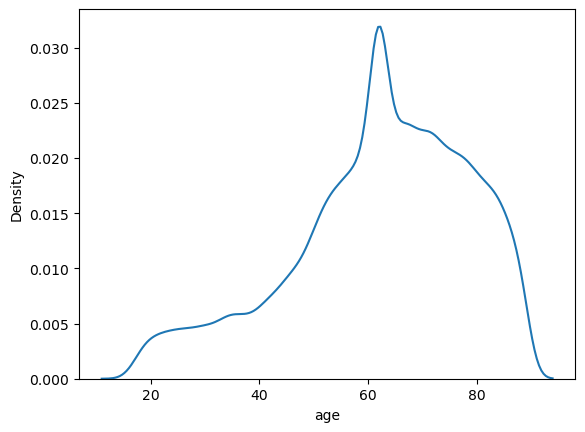

In [55]:
sns.distplot(df['age'],hist = False)

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

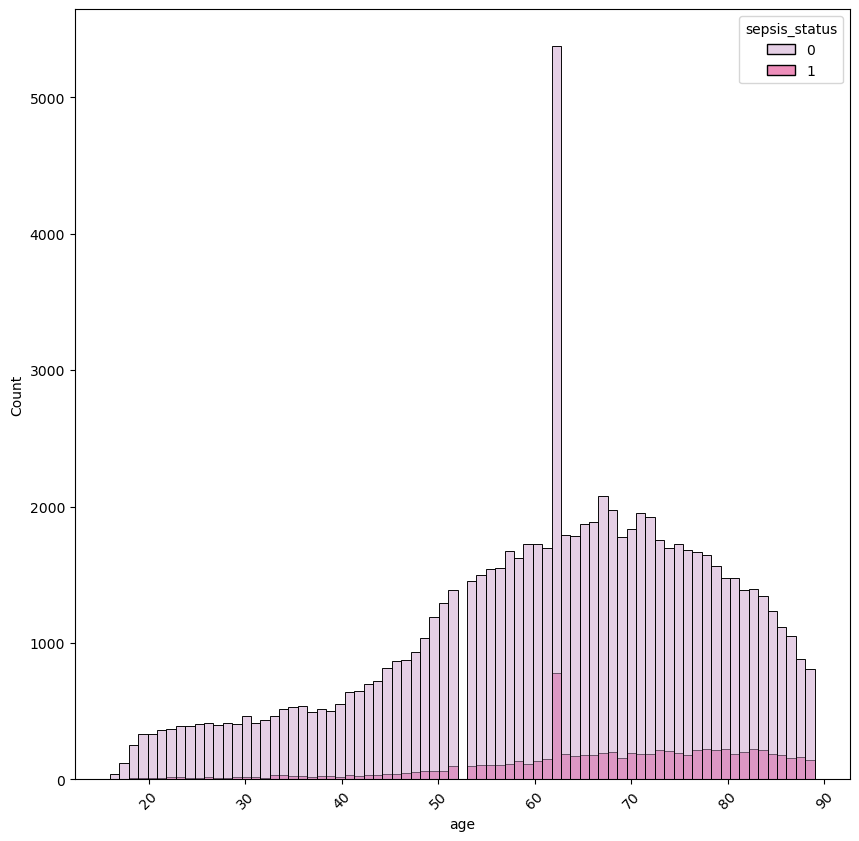

In [56]:
plt.figure(figsize=(10,10))
sns.histplot(x='age',data=df,hue='sepsis_status',palette='PuRd')
plt.xticks(rotation = 45)

In [57]:
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [58]:
df['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary',
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Caucasian'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'African American'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Native American'),
  Text(5, 0, 'Other/Unknown')])

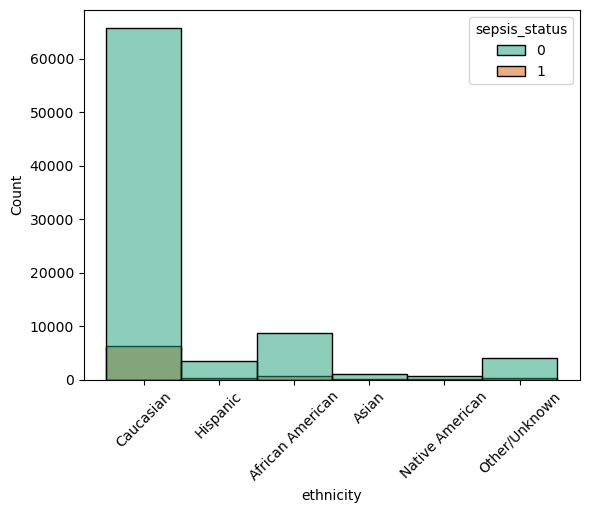

In [59]:
sns.histplot(x='ethnicity',data=df,hue='sepsis_status',palette='Dark2')
plt.xticks(rotation = 45)

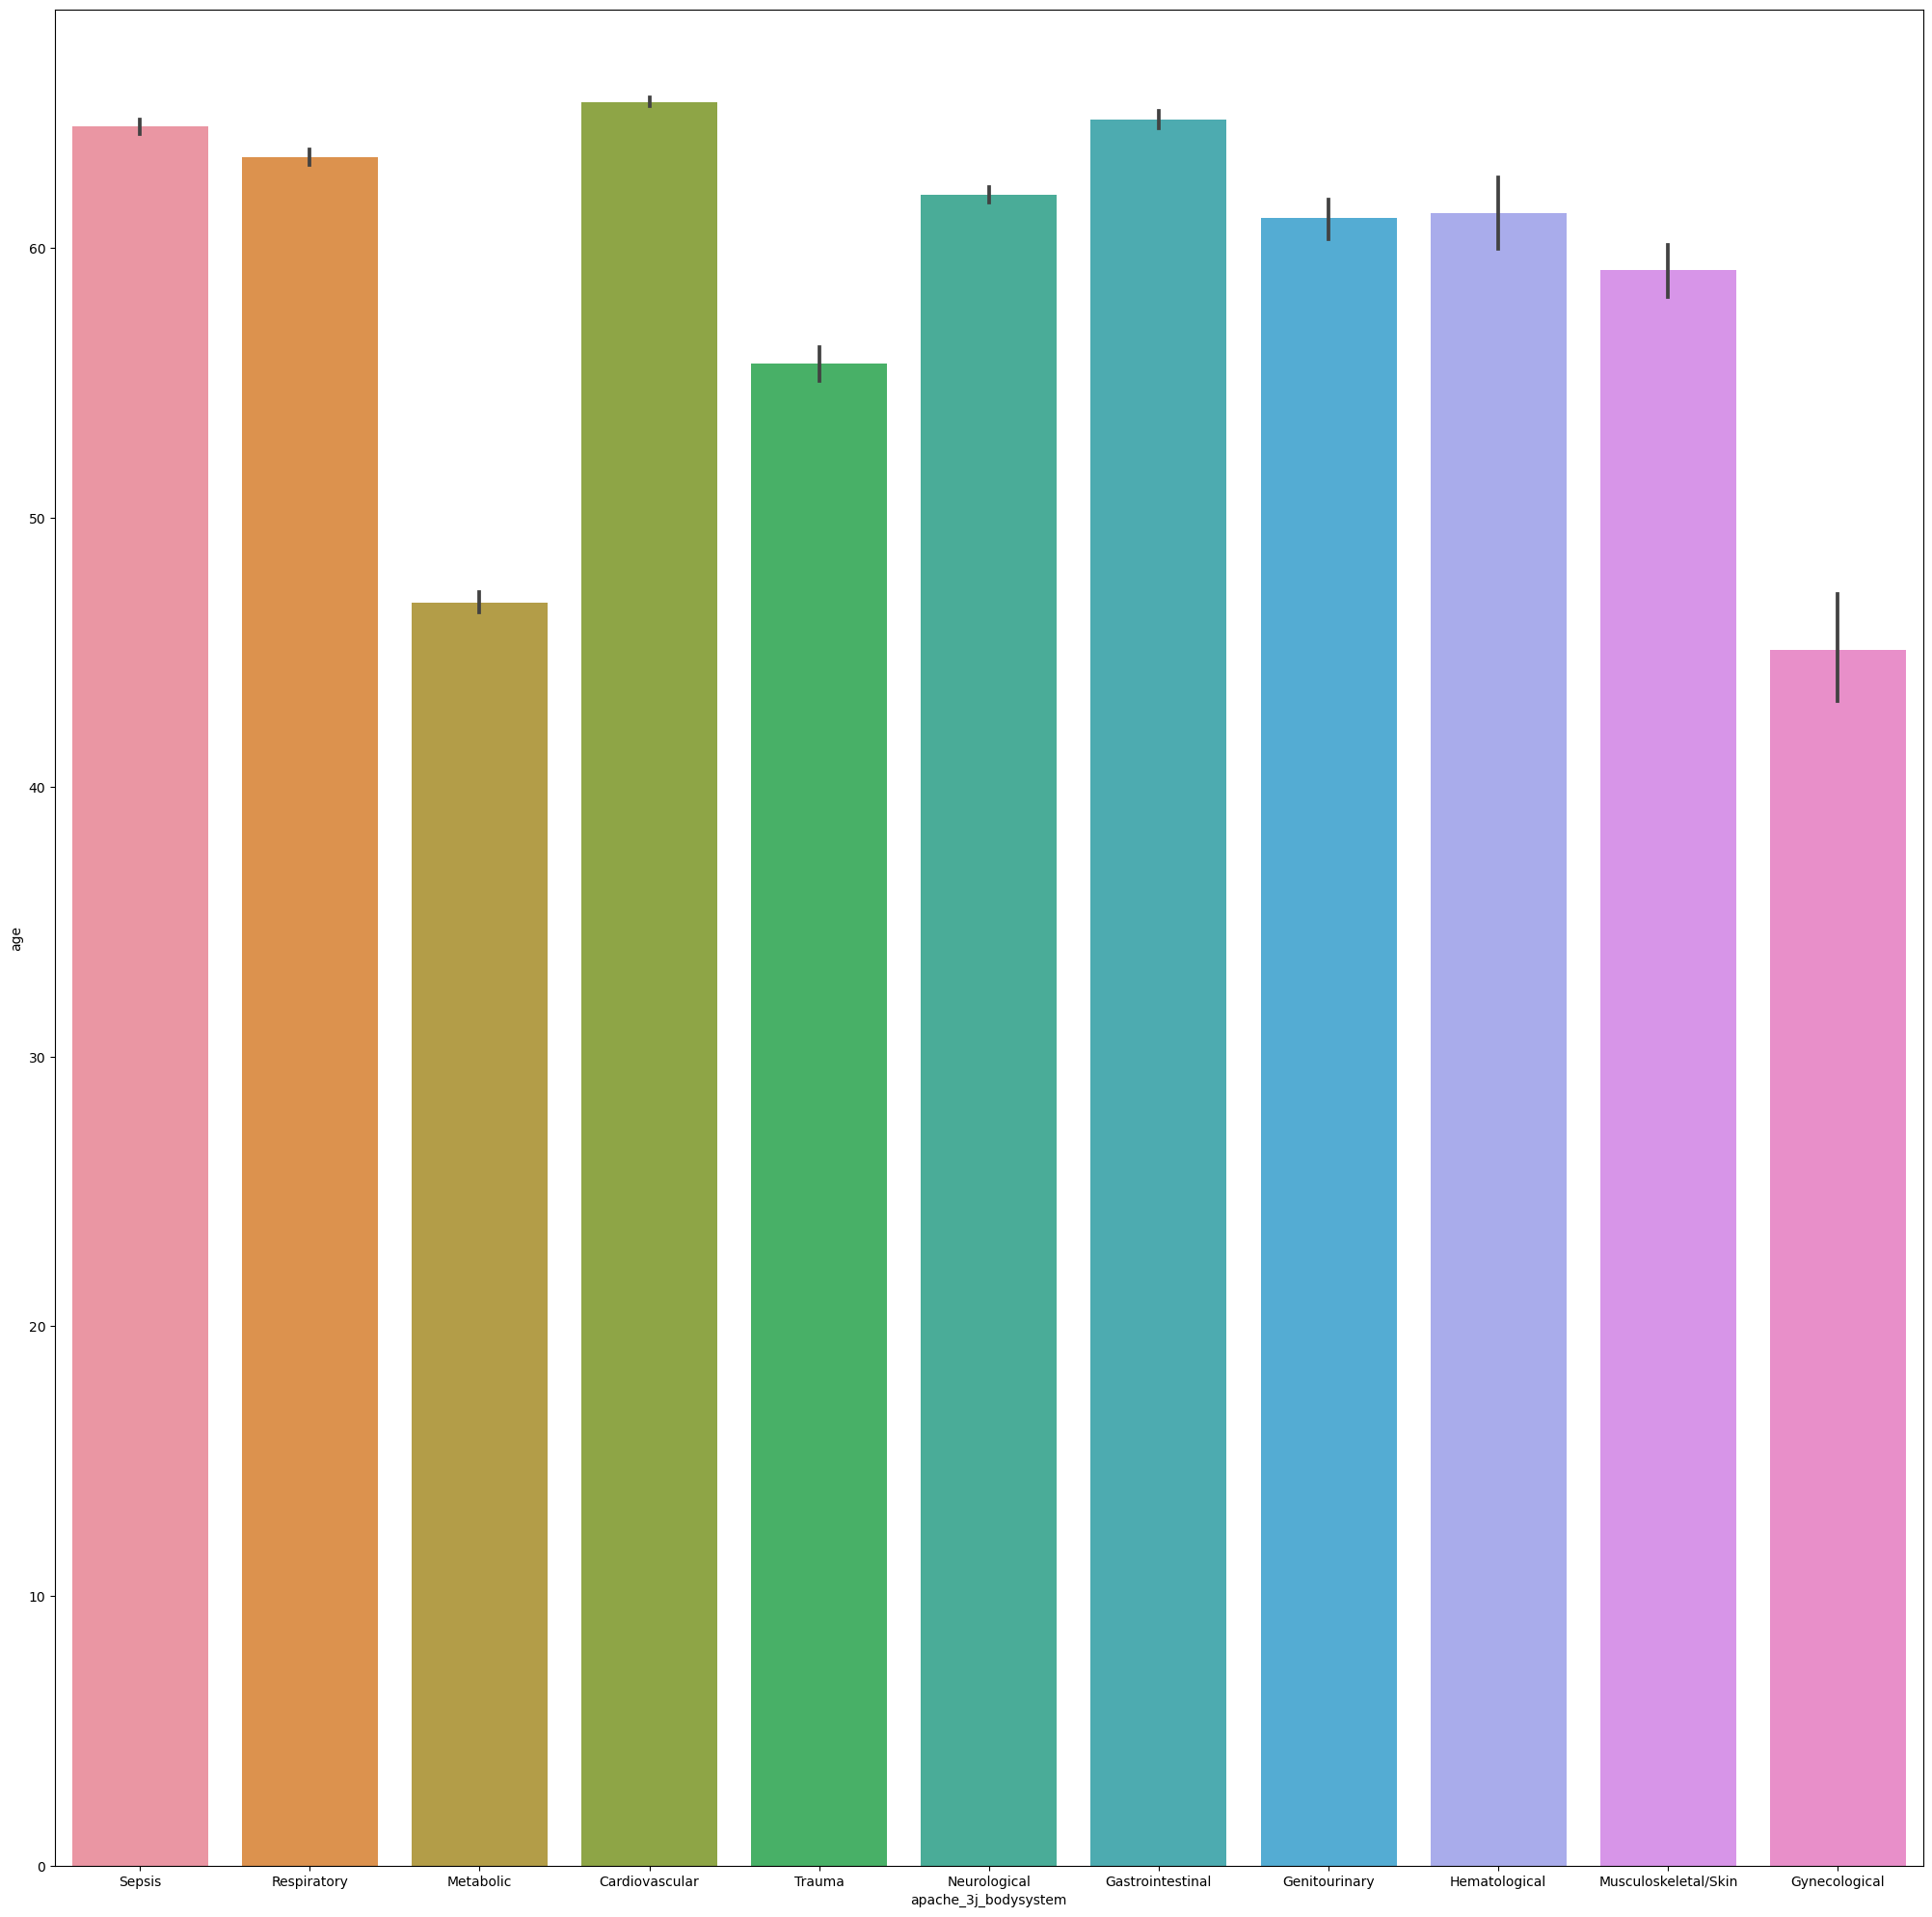

In [60]:
plt.figure(figsize=(25,25))
#sns.barplot(x=df['apache_3j_bodysystem'])
sns.barplot(x = 'apache_3j_bodysystem', y = 'age', data = df)
plt.show()

In [61]:
funnel_stages = ['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary',
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological']

#calculate the number of users and conversions for each stage
num_users = []
num_conversions = []

for stage in funnel_stages:
    stage_users = df[df['apache_3j_bodysystem'] == stage]
    num_users.append(len(stage_users))
    num_conversions.append(stage_users['sepsis_status'].sum())

#create a funnel chart
fig = go.Figure(go.Funnel(
    y=funnel_stages,
    x=num_users,
    textposition='inside',
    textinfo='value',
    name='Sepsis No'
))

fig.add_trace(go.Funnel(
    y=funnel_stages,
    x=num_conversions,
    textposition='inside',
    textinfo='value',
    name='Sepsis Yes'
))

fig.update_layout(
    title='Funnel Analysis on apache_3j_bodysystem',
    funnelmode='stack'
)

fig.show()

In [62]:
funnel_stages = ['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary',
       'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses']

#calculate the number of users and conversions for each stage
num_users = []
num_conversions = []

for stage in funnel_stages:
    stage_users = df[df['apache_2_bodysystem'] == stage]
    num_users.append(len(stage_users))
    num_conversions.append(stage_users['sepsis_status'].sum())

#create a funnel chart
fig = go.Figure(go.Funnel(
    y=funnel_stages,
    x=num_users,
    textposition='inside',
    textinfo='value',
    name='No'
))

fig.add_trace(go.Funnel(
    y=funnel_stages,
    x=num_conversions,
    textposition='inside',
    textinfo='value',
    name='Yes'
))

fig.update_layout(
    title='Funnel Analysis sepsis on apache_2_bodysystem',
    funnelmode='stack'
)

fig.show()

In [63]:
df['sepsis_status']==0,

(0        True
 1        True
 2        True
 3        True
 4        True
          ... 
 91708    True
 91709    True
 91710    True
 91711    True
 91712    True
 Name: sepsis_status, Length: 91713, dtype: bool,)

In [64]:
funnel_stages = ['M','F']

#calculate the number of users and conversions for each stage
num_users = []
num_conversions = []

for stage in funnel_stages:
    stage_users = df[df['gender'] == stage]
    num_users.append(len(stage_users))
    num_conversions.append(stage_users['sepsis_status'].sum())

#create a funnel chart
fig = go.Figure(go.Funnel(
    y=funnel_stages,
    x=num_users,
    textposition='inside',
    textinfo='value',
    name='Users'
))

fig.add_trace(go.Funnel(
    y=funnel_stages,
    x=num_conversions,
    textposition='inside',
    textinfo='value',
    name='sepsis_status'
))

fig.update_layout(
    title='Funnel Analysis',
    funnelmode='stack'
)

fig.show()


In [65]:
df['gender'].max()

'M'

In [66]:
df

age  bmi  elective_surgery  ethnicity gender  height  pre_icu_los_days  \
0       68   22                 0  Caucasian      M     180                 0   
1       77   27                 0  Caucasian      F     160                 0   
2       25   31                 0  Caucasian      F     172                 0   
3       81   22                 1  Caucasian      F     165                 0   
4       19   29                 0  Caucasian      M     188                 0   
...    ...  ...               ...        ...    ...     ...               ...   
91708   75   23                 0  Caucasian      M     177                 0   
91709   56   47                 0  Caucasian      F     183                 0   
91710   48   27                 0  Caucasian      M     170                 0   
91711   62   23                 0  Caucasian      F     154                 0   
91712   82   22                 1  Caucasian      F     160                 0   

       weight  apache_2_diagnosis  apache_3j_diagnosis  arf_apache  \
0          73                 113                  502           0   
1          70                 108                  203           0   
2          95                 122                  703           0   
3          61                 203                 1206           0   
4          84                 119                  601           0   
...       ...                 ...                  ...         ...   
91708      72                 113                  501           0   
91709     158                 113                  501           0   
91710      78                 123                  702           0   
91711      55                 108                  203           0   
91712      56                 304                 1409           0   

       gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                    3                 6                  0   
1                    1                 3                  0   
2                    3                 6                  0   
3                    4                 6                  0   
4                    3                 5                  0   
...                ...               ...                ...   
91708                4                 6                  0   
91709                4                 6                  0   
91710                3                 6                  0   
91711                4                 5                  0   
91712                4                 6                  0   

       gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  \
0                      4                118                 0          40   
1                      1                120                 0          46   
2                      5                102                 0          68   
3                      5                114                 1          60   
4                      3                 60                 0         103   
...                  ...                ...               ...         ...   
91708                  5                115                 0          48   
91709                  5                100                 0          62   
91710                  4                158                 0          57   
91711                  4                 60                 0          54   
91712                  1                101                 0          56   

       resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0                   36           39                  0             68   
1                   33           35                  1             95   
2                   37           36                  0             88   
3                    4           34                  1             48   
4                   16           36                  0             99   
...                ...          ...                ...            ...   


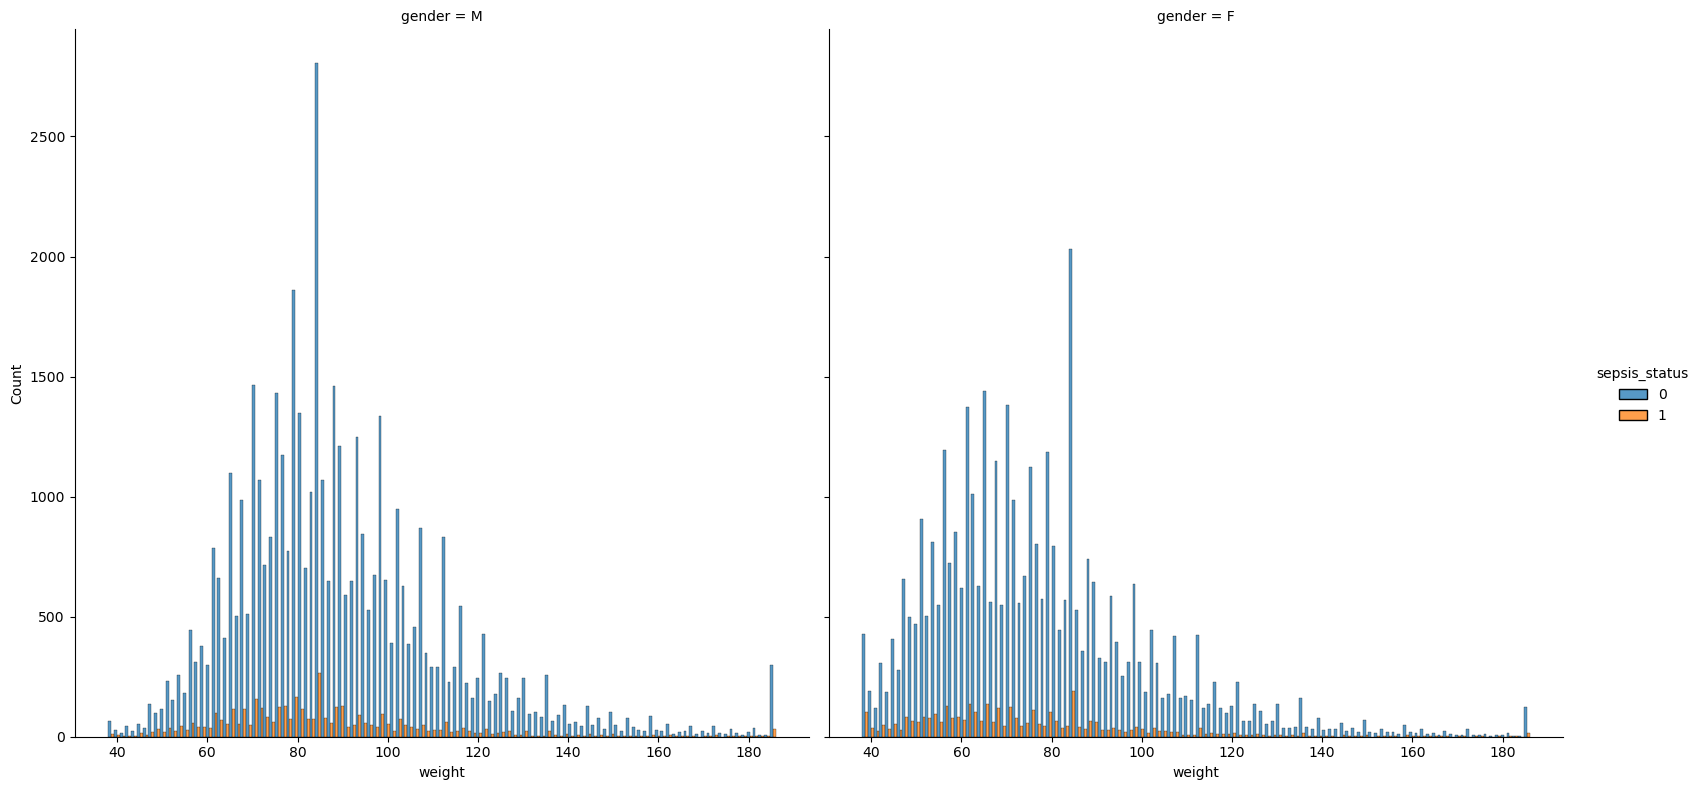

In [67]:

sns.displot(df, x="weight", hue="sepsis_status", multiple="dodge",col='gender',height=8,aspect=1)

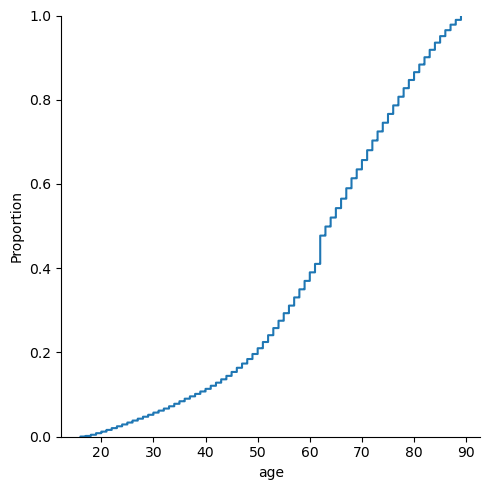

In [68]:
sns.displot(df, x="age", kind="ecdf")

In [69]:
sns.barplot(df['sepsis_status'],df["gender"])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\robin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\robin\AppData\Local\Temp\ipykernel_25960\376280094.py", line 1, in <module>
    sns.barplot(df['sepsis_status'],df["gender"])
TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\robin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 [Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180'),
  Text(200.0, 0, '200')])

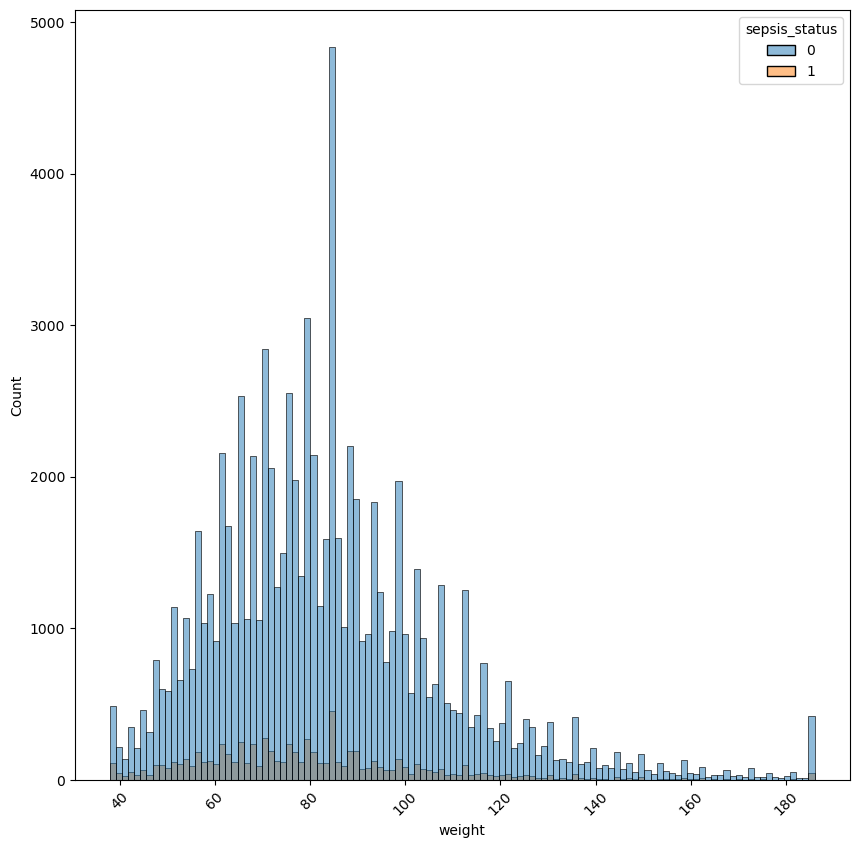

In [70]:
plt.figure(figsize=(10,10))
sns.histplot(x='weight',data=df,hue='sepsis_status')
plt.xticks(rotation = 45)

In [71]:
#plt.figure(figsize=(20,20))
#sns.histplot(x='weight',data=df,hue='gender',pallete)
#plt.xticks(rotation = 45)

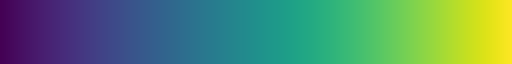

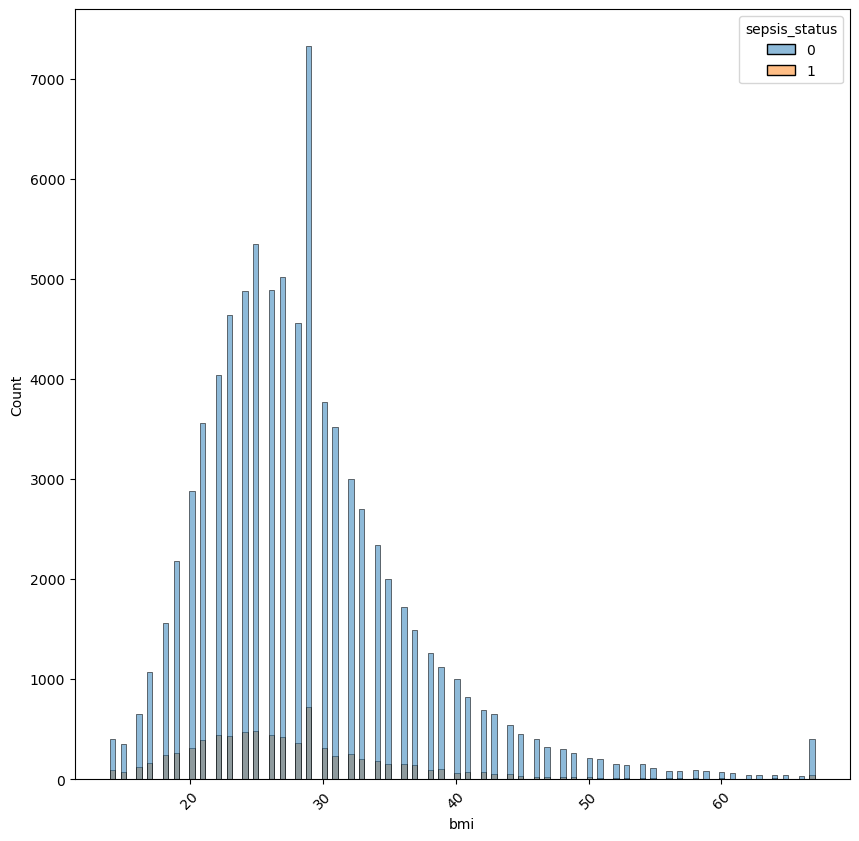

In [72]:
plt.figure(figsize=(10,10))
sns.histplot(x='bmi',data=df,hue='sepsis_status')
plt.xticks(rotation = 45)
sns.color_palette("viridis", as_cmap=True)

In [73]:
df

age  bmi  elective_surgery  ethnicity gender  height  pre_icu_los_days  \
0       68   22                 0  Caucasian      M     180                 0   
1       77   27                 0  Caucasian      F     160                 0   
2       25   31                 0  Caucasian      F     172                 0   
3       81   22                 1  Caucasian      F     165                 0   
4       19   29                 0  Caucasian      M     188                 0   
...    ...  ...               ...        ...    ...     ...               ...   
91708   75   23                 0  Caucasian      M     177                 0   
91709   56   47                 0  Caucasian      F     183                 0   
91710   48   27                 0  Caucasian      M     170                 0   
91711   62   23                 0  Caucasian      F     154                 0   
91712   82   22                 1  Caucasian      F     160                 0   

       weight  apache_2_diagnosis  apache_3j_diagnosis  arf_apache  \
0          73                 113                  502           0   
1          70                 108                  203           0   
2          95                 122                  703           0   
3          61                 203                 1206           0   
4          84                 119                  601           0   
...       ...                 ...                  ...         ...   
91708      72                 113                  501           0   
91709     158                 113                  501           0   
91710      78                 123                  702           0   
91711      55                 108                  203           0   
91712      56                 304                 1409           0   

       gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                    3                 6                  0   
1                    1                 3                  0   
2                    3                 6                  0   
3                    4                 6                  0   
4                    3                 5                  0   
...                ...               ...                ...   
91708                4                 6                  0   
91709                4                 6                  0   
91710                3                 6                  0   
91711                4                 5                  0   
91712                4                 6                  0   

       gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  \
0                      4                118                 0          40   
1                      1                120                 0          46   
2                      5                102                 0          68   
3                      5                114                 1          60   
4                      3                 60                 0         103   
...                  ...                ...               ...         ...   
91708                  5                115                 0          48   
91709                  5                100                 0          62   
91710                  4                158                 0          57   
91711                  4                 60                 0          54   
91712                  1                101                 0          56   

       resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0                   36           39                  0             68   
1                   33           35                  1             95   
2                   37           36                  0             88   
3                    4           34                  1             48   
4                   16           36                  0             99   
...                ...          ...                ...            ...   


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['sepsis_status'],df['solid_tumor_with_metastasis'])



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\robin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\robin\AppData\Local\Temp\ipykernel_25960\1064019027.py", line 2, in <module>
    sns.barplot(df['sepsis_status'],df['solid_tumor_with_metastasis'])
TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\robin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^

<Figure size 1000x1000 with 0 Axes>

In [75]:
import statsmodels.api as sm
df1=sm.add_constant(df)

In [76]:
df1

const  age  bmi  elective_surgery  ethnicity gender  height  \
0        1.0   68   22                 0  Caucasian      M     180   
1        1.0   77   27                 0  Caucasian      F     160   
2        1.0   25   31                 0  Caucasian      F     172   
3        1.0   81   22                 1  Caucasian      F     165   
4        1.0   19   29                 0  Caucasian      M     188   
...      ...  ...  ...               ...        ...    ...     ...   
91708    1.0   75   23                 0  Caucasian      M     177   
91709    1.0   56   47                 0  Caucasian      F     183   
91710    1.0   48   27                 0  Caucasian      M     170   
91711    1.0   62   23                 0  Caucasian      F     154   
91712    1.0   82   22                 1  Caucasian      F     160   

       pre_icu_los_days  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                     0      73                 113                  502   
1                     0      70                 108                  203   
2                     0      95                 122                  703   
3                     0      61                 203                 1206   
4                     0      84                 119                  601   
...                 ...     ...                 ...                  ...   
91708                 0      72                 113                  501   
91709                 0     158                 113                  501   
91710                 0      78                 123                  702   
91711                 0      55                 108                  203   
91712                 0      56                 304                 1409   

       arf_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0               0                3                 6                  0   
1               0                1                 3                  0   
2               0                3                 6                  0   
3               0                4                 6                  0   
4               0                3                 5                  0   
...           ...              ...               ...                ...   
91708           0                4                 6                  0   
91709           0                4                 6                  0   
91710           0                3                 6                  0   
91711           0                4                 5                  0   
91712           0                4                 6                  0   

       gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  \
0                      4                118                 0          40   
1                      1                120                 0          46   
2                      5                102                 0          68   
3                      5                114                 1          60   
4                      3                 60                 0         103   
...                  ...                ...               ...         ...   
91708                  5                115                 0          48   
91709                  5                100                 0          62   
91710                  4                158                 0          57   
91711                  4                 60                 0          54   
91712                  1                101                 0          56   

       resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0                   36           39                  0             68   
1                   33           35                  1             95   
2                   37           36                  0             88   
3                    4           34                  1             48   
4                   16           36                  0        

In [77]:
df1

const  age  bmi  elective_surgery  ethnicity gender  height  \
0        1.0   68   22                 0  Caucasian      M     180   
1        1.0   77   27                 0  Caucasian      F     160   
2        1.0   25   31                 0  Caucasian      F     172   
3        1.0   81   22                 1  Caucasian      F     165   
4        1.0   19   29                 0  Caucasian      M     188   
...      ...  ...  ...               ...        ...    ...     ...   
91708    1.0   75   23                 0  Caucasian      M     177   
91709    1.0   56   47                 0  Caucasian      F     183   
91710    1.0   48   27                 0  Caucasian      M     170   
91711    1.0   62   23                 0  Caucasian      F     154   
91712    1.0   82   22                 1  Caucasian      F     160   

       pre_icu_los_days  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                     0      73                 113                  502   
1                     0      70                 108                  203   
2                     0      95                 122                  703   
3                     0      61                 203                 1206   
4                     0      84                 119                  601   
...                 ...     ...                 ...                  ...   
91708                 0      72                 113                  501   
91709                 0     158                 113                  501   
91710                 0      78                 123                  702   
91711                 0      55                 108                  203   
91712                 0      56                 304                 1409   

       arf_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0               0                3                 6                  0   
1               0                1                 3                  0   
2               0                3                 6                  0   
3               0                4                 6                  0   
4               0                3                 5                  0   
...           ...              ...               ...                ...   
91708           0                4                 6                  0   
91709           0                4                 6                  0   
91710           0                3                 6                  0   
91711           0                4                 5                  0   
91712           0                4                 6                  0   

       gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  \
0                      4                118                 0          40   
1                      1                120                 0          46   
2                      5                102                 0          68   
3                      5                114                 1          60   
4                      3                 60                 0         103   
...                  ...                ...               ...         ...   
91708                  5                115                 0          48   
91709                  5                100                 0          62   
91710                  4                158                 0          57   
91711                  4                 60                 0          54   
91712                  1                101                 0          56   

       resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0                   36           39                  0             68   
1                   33           35                  1             95   
2                   37           36                  0             88   
3                    4           34                  1             48   
4                   16           36                  0        

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
df1[['ethnicity', 'gender','apache_3j_bodysystem', 'apache_2_bodysystem']]=df1[['ethnicity', 'gender','apache_3j_bodysystem', 'apache_2_bodysystem']].apply(le.fit_transform)

In [80]:
vif1=pd.DataFrame()
vif1["variables"]=df1.columns
vif1["VIF"]=[variance_inflation_factor(df1.values,i)
           for i in range(df1.shape[1])]
vif1

variables          VIF
0                         const  9141.633503
1                           age     1.274183
2                           bmi    17.776196
3              elective_surgery     3.365818
4                     ethnicity     1.033468
..                          ...          ...
58                     lymphoma     1.013564
59  solid_tumor_with_metastasis     1.091160
60         apache_3j_bodysystem     1.846577
61          apache_2_bodysystem     1.638114
62                sepsis_status     1.240353

[63 rows x 2 columns]

In [81]:
high_vif1=vif1[vif1["VIF"]>10].sort_values("VIF")
high_vif1.shape

(3, 2)

In [82]:
df2=df1.drop(high_vif1["variables"],axis=1)
df2.shape

(91713, 60)

In [83]:
df2

age  elective_surgery  ethnicity  gender  height  pre_icu_los_days  \
0       68                 0          2       1     180                 0   
1       77                 0          2       0     160                 0   
2       25                 0          2       0     172                 0   
3       81                 1          2       0     165                 0   
4       19                 0          2       1     188                 0   
...    ...               ...        ...     ...     ...               ...   
91708   75                 0          2       1     177                 0   
91709   56                 0          2       0     183                 0   
91710   48                 0          2       1     170                 0   
91711   62                 0          2       0     154                 0   
91712   82                 1          2       0     160                 0   

       apache_2_diagnosis  apache_3j_diagnosis  arf_apache  gcs_eyes_apache  \
0                     113                  502           0                3   
1                     108                  203           0                1   
2                     122                  703           0                3   
3                     203                 1206           0                4   
4                     119                  601           0                3   
...                   ...                  ...         ...              ...   
91708                 113                  501           0                4   
91709                 113                  501           0                4   
91710                 123                  702           0                3   
91711                 108                  203           0                4   
91712                 304                 1409           0                4   

       gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0                     6                  0                  4   
1                     3                  0                  1   
2                     6                  0                  5   
3                     6                  0                  5   
4                     5                  0                  3   
...                 ...                ...                ...   
91708                 6                  0                  5   
91709                 6                  0                  5   
91710                 6                  0                  4   
91711                 5                  0                  4   
91712                 6                  0                  1   

       heart_rate_apache  intubated_apache  map_apache  resprate_apache  \
0                    118                 0          40               36   
1                    120                 0          46               33   
2                    102                 0          68               37   
3                    114                 1          60                4   
4                     60                 0         103               16   
...                  ...               ...         ...              ...   
91708                115                 0          48                9   
91709                100                 0          62               33   
91710                158                 0          57                4   
91711                 60                 0          54               14   
91712                101                 0          56                4   

       temp_apache  ventilated_apache  d1_diasbp_max  d1_diasbp_min  \
0               39                  0             68             37   
1               35                  1             95             31   
2               36                  0             88             48   
3               34                  1             48             42   
4               36                  0             99             57   
...            ...       

In [84]:
df

age  bmi  elective_surgery  ethnicity gender  height  pre_icu_los_days  \
0       68   22                 0  Caucasian      M     180                 0   
1       77   27                 0  Caucasian      F     160                 0   
2       25   31                 0  Caucasian      F     172                 0   
3       81   22                 1  Caucasian      F     165                 0   
4       19   29                 0  Caucasian      M     188                 0   
...    ...  ...               ...        ...    ...     ...               ...   
91708   75   23                 0  Caucasian      M     177                 0   
91709   56   47                 0  Caucasian      F     183                 0   
91710   48   27                 0  Caucasian      M     170                 0   
91711   62   23                 0  Caucasian      F     154                 0   
91712   82   22                 1  Caucasian      F     160                 0   

       weight  apache_2_diagnosis  apache_3j_diagnosis  arf_apache  \
0          73                 113                  502           0   
1          70                 108                  203           0   
2          95                 122                  703           0   
3          61                 203                 1206           0   
4          84                 119                  601           0   
...       ...                 ...                  ...         ...   
91708      72                 113                  501           0   
91709     158                 113                  501           0   
91710      78                 123                  702           0   
91711      55                 108                  203           0   
91712      56                 304                 1409           0   

       gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                    3                 6                  0   
1                    1                 3                  0   
2                    3                 6                  0   
3                    4                 6                  0   
4                    3                 5                  0   
...                ...               ...                ...   
91708                4                 6                  0   
91709                4                 6                  0   
91710                3                 6                  0   
91711                4                 5                  0   
91712                4                 6                  0   

       gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  \
0                      4                118                 0          40   
1                      1                120                 0          46   
2                      5                102                 0          68   
3                      5                114                 1          60   
4                      3                 60                 0         103   
...                  ...                ...               ...         ...   
91708                  5                115                 0          48   
91709                  5                100                 0          62   
91710                  4                158                 0          57   
91711                  4                 60                 0          54   
91712                  1                101                 0          56   

       resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0                   36           39                  0             68   
1                   33           35                  1             95   
2                   37           36                  0             88   
3                    4           34                  1             48   
4                   16           36                  0             99   
...                ...          ...                ...            ...   


In [85]:
s_c=StandardScaler()

In [86]:
X = df2.drop(['sepsis_status'],axis=1)  # features
Y = df2['sepsis_status']  # target

In [87]:
X

age  elective_surgery  ethnicity  gender  height  pre_icu_los_days  \
0       68                 0          2       1     180                 0   
1       77                 0          2       0     160                 0   
2       25                 0          2       0     172                 0   
3       81                 1          2       0     165                 0   
4       19                 0          2       1     188                 0   
...    ...               ...        ...     ...     ...               ...   
91708   75                 0          2       1     177                 0   
91709   56                 0          2       0     183                 0   
91710   48                 0          2       1     170                 0   
91711   62                 0          2       0     154                 0   
91712   82                 1          2       0     160                 0   

       apache_2_diagnosis  apache_3j_diagnosis  arf_apache  gcs_eyes_apache  \
0                     113                  502           0                3   
1                     108                  203           0                1   
2                     122                  703           0                3   
3                     203                 1206           0                4   
4                     119                  601           0                3   
...                   ...                  ...         ...              ...   
91708                 113                  501           0                4   
91709                 113                  501           0                4   
91710                 123                  702           0                3   
91711                 108                  203           0                4   
91712                 304                 1409           0                4   

       gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0                     6                  0                  4   
1                     3                  0                  1   
2                     6                  0                  5   
3                     6                  0                  5   
4                     5                  0                  3   
...                 ...                ...                ...   
91708                 6                  0                  5   
91709                 6                  0                  5   
91710                 6                  0                  4   
91711                 5                  0                  4   
91712                 6                  0                  1   

       heart_rate_apache  intubated_apache  map_apache  resprate_apache  \
0                    118                 0          40               36   
1                    120                 0          46               33   
2                    102                 0          68               37   
3                    114                 1          60                4   
4                     60                 0         103               16   
...                  ...               ...         ...              ...   
91708                115                 0          48                9   
91709                100                 0          62               33   
91710                158                 0          57                4   
91711                 60                 0          54               14   
91712                101                 0          56                4   

       temp_apache  ventilated_apache  d1_diasbp_max  d1_diasbp_min  \
0               39                  0             68             37   
1               35                  1             95             31   
2               36                  0             88             48   
3               34                  1             48             42   
4               36                  0             99             57   
...            ...       

In [88]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: sepsis_status, Length: 91713, dtype: int32

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=100)

In [91]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score,classification_report

In [92]:
def mat(xtrain,xtest,ytrain,ytest):
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    lr=LogisticRegression()
    dt=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    svc=SVC(probability=True)
    
    #for logistic regression
    lr.fit(xtrain,ytrain)
    ypredlr=lr.predict(xtest)
    
    #for decision tree classifer
    dt.fit(xtrain,ytrain)
    ypreddt=dt.predict(xtest)
    
    #for randomforest classifer
    rf.fit(xtrain,ytrain)
    ypredrf=rf.predict(xtest)
    
    #for svc
    svc.fit(xtrain,ytrain)
    ypredsvc=svc.predict(xtest)
    
    print("this is for logistic regression \n")
    y_pred_proba = lr.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypredlr)
    auc = metrics.roc_auc_score(ytest, ypredlr)
    plt.figure(figsize=(12,10))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.title("Receiver Operating Characteristic Curve (ROC)")
    plt.xlabel("FPR ---->")
    plt.ylabel("TPR ---->")
    plt.show()
    
    
    y_pred_proba1 = dt.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypreddt)
    auc = metrics.roc_auc_score(ytest, ypreddt)
    print("this is for decision tree classifier \n")
    plt.figure(figsize=(12,10))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.title("Receiver Operating Characteristic Curve (ROC)")
    plt.xlabel("FPR ---->")
    plt.ylabel("TPR ---->")
    plt.show()

    
    y_pred_proba2 = rf.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypredrf)
    auc = metrics.roc_auc_score(ytest, ypredrf)
    print("this is for random forest classifer \n")
    plt.figure(figsize=(12,10))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.title("Receiver Operating Characteristic Curve (ROC)")
    plt.xlabel("FPR ---->")
    plt.ylabel("TPR ---->")
    plt.show()
        
    
    y_pred_proba3 = svc.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypredsvc)
    auc = metrics.roc_auc_score(ytest, ypredsvc)
    print("this is for svc \n")
    plt.figure(figsize=(12,10))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.title("Receiver Operating Characteristic Curve (ROC)")
    plt.xlabel("FPR ---->")
    plt.ylabel("TPR ---->")
    plt.show()
    print("this is for logistic regression \n")
    
    
    

In [93]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [94]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC(probability=True)

#for logistic regression
lr.fit(X_res, y_res)
ypredlr=lr.predict(x_test)

this is for logistic regression 



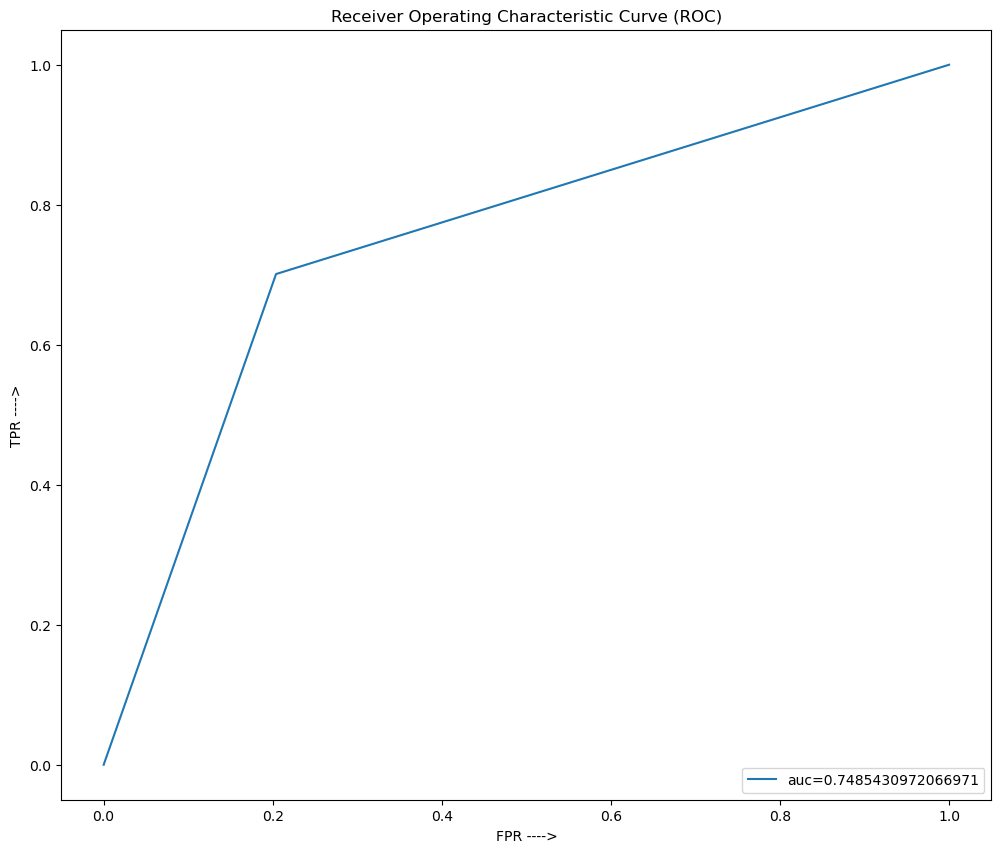

In [95]:
print("this is for logistic regression \n")
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, ypredlr)
auc = metrics.roc_auc_score(y_test, ypredlr)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()


In [96]:
dt.fit(X_res, y_res)
ypreddt=dt.predict(x_test)

#for randomforest classifer
rf.fit(X_res, y_res)
ypredrf=rf.predict(x_test)

#for svc
svc.fit(X_res, y_res)
ypredsvc=svc.predict(x_test)
    

In [ ]:
print("this is for logistic regression \n")
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, ypreddt)
auc = metrics.roc_auc_score(y_test, ypreddt)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [ ]:
#mat(X_res,x_test,y_res,y_test)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()

In [ ]:
X_under,y_under=under.fit_resample(x_train,y_train)

In [ ]:
lr.fit(X_under,y_under)

In [ ]:
Y_pred_lr=lr.predict(x_test)

In [ ]:
print("Logistic regression performance \n",lr.score(X_under,y_under))

print("LR \n",accuracy_score(y_test,Y_pred_lr))
print("confusion matrix \n",confusion_matrix(y_test,Y_pred_lr))
print("classification report \n",classification_report(y_test,Y_pred_lr))

In [ ]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, Y_pred_lr)
auc = metrics.roc_auc_score(y_test, Y_pred_lr)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [ ]:
def models_test(xtrain,xtest,ytrain,ytest):
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    lr=LogisticRegression()
    dt=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    svc=SVC()
    #for logistic regression
    lr.fit(xtrain,ytrain)
    ypredlr=lr.predict(xtest)
    
    #for decision tree classifer
    dt.fit(xtrain,ytrain)
    ypreddt=dt.predict(xtest)
    
    #for randomforest classifer
    rf.fit(xtrain,ytrain)
    ypredrf=rf.predict(xtest)
    
    #for svc
    svc.fit(xtrain,ytrain)
    ypredsvc=svc.predict(xtest)
    
    print('Result for Logistic regression')
    print("Logistic regression performance \n",lr.score(xtrain,ytrain))
    print("LR \n",accuracy_score(ytest,ypredlr))
    print("confusion matrix \n",confusion_matrix(ytest,ypredlr))
    print("classification report \n",classification_report(ytest,ypredlr))
    
    print('Result for DecisionTreeClassifier')
    print("DecisionTreeClassifier performance \n",dt.score(xtrain,ytrain))
    print("DecisionTreeClassifier \n",accuracy_score(ytest,ypreddt))
    print("confusion matrix \n",confusion_matrix(ytest,ypreddt))
    print("classification report \n",classification_report(ytest,ypreddt))
    
    print('Result for RandomForestClassifier')
    print("RandomForestClassifier performance \n",rf.score(xtrain,ytrain))
    print("RandomForestClassifier \n",accuracy_score(ytest,ypredrf))
    print("confusion matrix \n",confusion_matrix(ytest,ypredrf))
    print("classification report \n",classification_report(ytest,ypredrf))
    
    print('Result for SVC')
    print("SVC performance \n",svc.score(xtrain,ytrain))
    print("SVC \n",accuracy_score(ytest,ypredsvc))
    print("confusion matrix \n",confusion_matrix(ytest,ypredsvc))
    print("classification report \n",classification_report(ytest,ypredsvc))
    
    
    
    
    


In [ ]:
models_test(x_train,x_test,y_train,y_test)

In [ ]:
mat(X_under,x_test,y_under,y_test)

In [ ]:
models_test(X_under,x_test,y_under,y_test)

In [ ]:
models_test(X_res,x_test,y_res,y_test)